## Question: what is the average player cost by age and overage country rating in FIFA 2018?

In [2]:
#import the modules
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

%matplotlib inline

In [3]:
#read the source file
df = pd.read_csv('fifa18_clean.csv')
df.head()

,Wage (€),Value (€),Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,565000,95500000,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,565000,105000000,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,280000,123000000,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,510000,97000000,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,230000,61000000,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#rename the columns
df.rename(columns={'Value (€)':'Value',
                       'Wage (€)':'Wage'},
         inplace = True)
           
df.head()

,Wage,Value,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,565000,95500000,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,565000,105000000,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,280000,123000000,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,510000,97000000,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,230000,61000000,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Barchart for player cost

In [5]:
#calculate the average player cost based on age
gr = df[['Age', 'Value']].groupby('Age').mean().reset_index()
gr.sort_values('Value', ascending = False)[:5]

,Age,Value
10,26,3.602691e+06
14,30,3.504726e+06
11,27,3.310399e+06
12,28,3.293092e+06
9,25,3.122208e+06


In [6]:
# choose the chart style
plt.style.use('seaborn-deep')

In [7]:
# function for cost displaying
def currency(x, pos):
    if x >= 1000000:
        return '${:1.1f}M'.format(x*1e-6)
    return '${:1.0f}K'.format(x*1e-3)

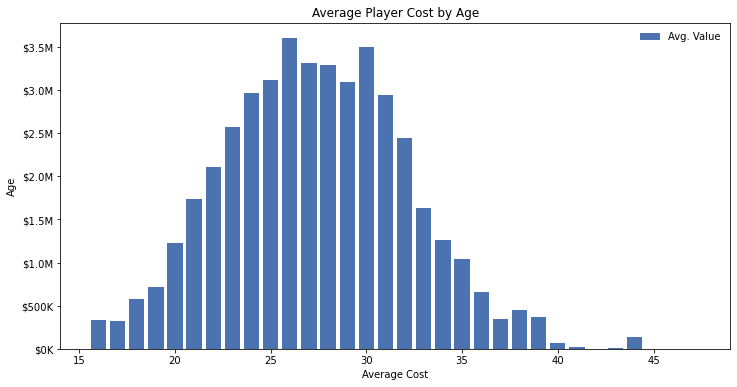

In [8]:
fig, ax = plt.subplots(figsize=(12, 6)) # set the axis and figure size
plt.bar(gr.Age, gr.Value)
ax.set(title='Average Player Cost by Age', xlabel='Average Cost', ylabel='Age') # name the axis and chart
formatter = FuncFormatter(currency)
ax.yaxis.set_major_formatter(formatter) #function for sum formatting
ax.legend(['Avg. Value'], frameon=False) #rename the legend, turn off the frame

### Linechart for country rating

In [9]:
#group country based on rating
cnt = df[['Nationality', 'Overall']].groupby('Nationality').mean().reset_index()
res = cnt.sort_values('Overall', ascending = False)[:15]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

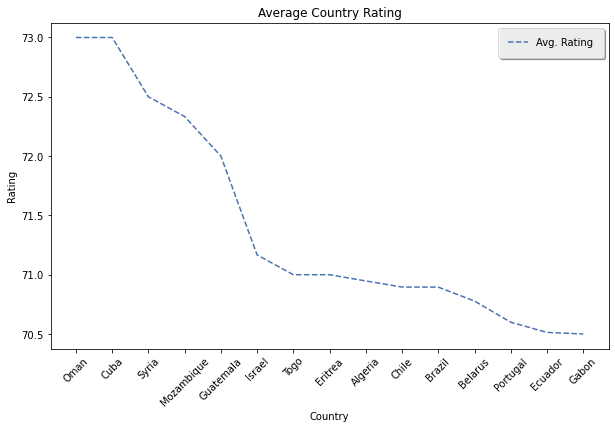

In [10]:
fig, ax = plt.subplots(figsize=(10, 6)) #setting figure size
plt.plot(res.Nationality ,res.Overall, linestyle='--') #usind the dashed line style
ax.set(title='Average Country Rating', xlabel='Country', ylabel='Rating') # label the axis the the chart
ax.legend(['Avg. Rating'], fancybox=True, framealpha=0.8, shadow=True, borderpad=1) #customizing the appearance
plt.xticks(rotation=45) # rotate the marks 